In [112]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
lifting_df = pd.read_csv("Resources/openpowerlifting.csv")
lifting_df.head()

/Users/johnwhendricks/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [114]:
#check for null values
lifting_df.isnull().sum()

Name                     0
Sex                      0
Event                    0
Equipment                0
Age                 665827
AgeClass            636554
Division              8178
BodyweightKg         16732
WeightClassKg        13312
Squat1Kg           1085774
Squat2Kg           1090005
Squat3Kg           1099512
Squat4Kg           1419658
Best3SquatKg        391904
Bench1Kg            923575
Bench2Kg            929868
Bench3Kg            944869
Bench4Kg           1413849
Best3BenchKg        147173
Deadlift1Kg        1059810
Deadlift2Kg        1067331
Deadlift3Kg        1083407
Deadlift4Kg        1414108
Best3DeadliftKg     341546
TotalKg             110170
Place                    0
Wilks               118947
McCulloch           119100
Glossbrenner        118947
IPFPoints           150068
Tested              329462
Country            1034470
Federation               0
Date                     0
MeetCountry              0
MeetState           481809
MeetName                 0
d

In [115]:
#set nulls in best lifts columns to 0
# df1 = lifting_df[lifting_df['Best3SquatKg'].isnull()]
# df2 = lifting_df[lifting_df['Best3BenchKg'].isnull()]
# df3 = lifting_df[lifting_df['Best3DeadliftKg'].isnull()]
# df1['Best3SquatKg'] = 0
# df2['Best3BenchKg'] = 0
# df3['Best3DeadliftKg'] = 0
# lifting_df.iloc[0:6, 0: 20]

In [116]:
lifting_df.count()

Name               1423354
Sex                1423354
Event              1423354
Equipment          1423354
Age                 757527
AgeClass            786800
Division           1415176
BodyweightKg       1406622
WeightClassKg      1410042
Squat1Kg            337580
Squat2Kg            333349
Squat3Kg            323842
Squat4Kg              3696
Best3SquatKg       1031450
Bench1Kg            499779
Bench2Kg            493486
Bench3Kg            478485
Bench4Kg              9505
Best3BenchKg       1276181
Deadlift1Kg         363544
Deadlift2Kg         356023
Deadlift3Kg         339947
Deadlift4Kg           9246
Best3DeadliftKg    1081808
TotalKg            1313184
Place              1423354
Wilks              1304407
McCulloch          1304254
Glossbrenner       1304407
IPFPoints          1273286
Tested             1093892
Country             388884
Federation         1423354
Date               1423354
MeetCountry        1423354
MeetState           941545
MeetName           1423354
d

In [117]:
#removed all rows with na vvalues
no_null_df = lifting_df.dropna()
no_null_df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
63986,Kylie Beutler,F,SBD,Wraps,23.0,20-23,Juniors 20-23,56.00,56,83.91,...,338.90,299.77,523.61,Yes,USA,WPA,2011-05-21,USA,CA,World Championships
66457,Kaitlynn Naert,F,SBD,Wraps,13.0,13-15,Teen 13-15,103.69,90+,43.09,...,263.24,175.84,359.25,Yes,USA,APA,2015-09-19,USA,MI,Wolverine Open
67030,Carol Moorhead,F,SBD,Wraps,55.0,55-59,Open,74.39,75,79.38,...,273.44,196.41,374.65,Yes,USA,APA,2017-04-22,USA,MO,ShowMe State Raw Championships
67031,Nancy Lowther,F,SBD,Wraps,58.0,55-59,Open,87.09,90,90.72,...,336.19,227.02,449.73,Yes,USA,APA,2017-04-22,USA,MO,ShowMe State Raw Championships
69557,Roger Shaw,M,SBD,Wraps,73.0,70-74,Masters 70-79,74.12,75,147.42,...,546.53,301.14,443.10,Yes,USA,APA,2018-11-17,USA,MO,Midwest Raw Championships


In [118]:
# droping all nulls leads to too little data
no_null_df.count()

Name               14
Sex                14
Event              14
Equipment          14
Age                14
AgeClass           14
Division           14
BodyweightKg       14
WeightClassKg      14
Squat1Kg           14
Squat2Kg           14
Squat3Kg           14
Squat4Kg           14
Best3SquatKg       14
Bench1Kg           14
Bench2Kg           14
Bench3Kg           14
Bench4Kg           14
Best3BenchKg       14
Deadlift1Kg        14
Deadlift2Kg        14
Deadlift3Kg        14
Deadlift4Kg        14
Best3DeadliftKg    14
TotalKg            14
Place              14
Wilks              14
McCulloch          14
Glossbrenner       14
IPFPoints          14
Tested             14
Country            14
Federation         14
Date               14
MeetCountry        14
MeetState          14
MeetName           14
dtype: int64

In [119]:
# returns series with no nulls for squats, not quite what is needed
clean_df = lifting_df['Best3SquatKg'].dropna()
clean_df

0          105.0
1          120.0
3          105.0
4          140.0
5          142.5
           ...  
1423348    200.0
1423349    175.0
1423350    110.0
1423351    160.0
1423353    115.0
Name: Best3SquatKg, Length: 1031450, dtype: float64

In [120]:
# for now, let's ignore null values and just do the analysis

#this is the age series
age = lifting_df['Age']

#this is the Bodyweight series
body_weight = lifting_df['BodyweightKg'] 

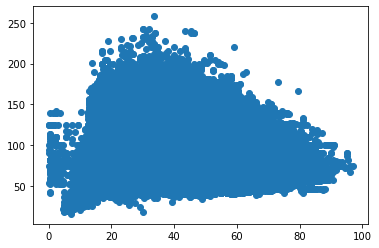

In [121]:
# lets make a scatter plot for body_weight vs age

plt.scatter(age, body_weight)
# too many points, need to change size

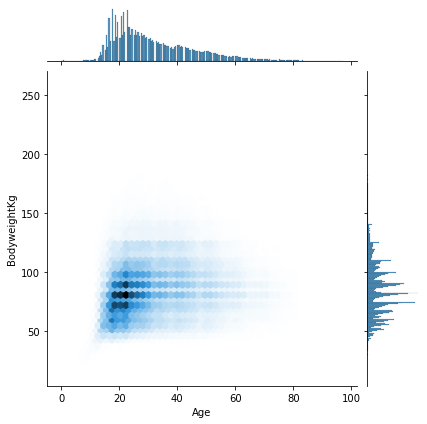

In [122]:
import seaborn as sb

sb.jointplot(x = 'Age', y='BodyweightKg', data = lifting_df, kind = 'hex')

<AxesSubplot:xlabel='Age', ylabel='BodyweightKg'>

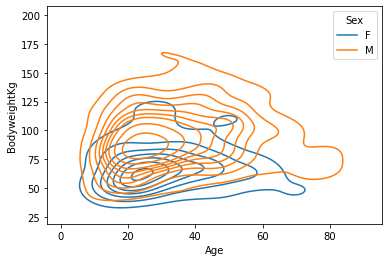

In [123]:
sample_data = lifting_df.sample(1000)
sb.kdeplot(x = 'Age', y='BodyweightKg', hue="Sex", data = sample_data)

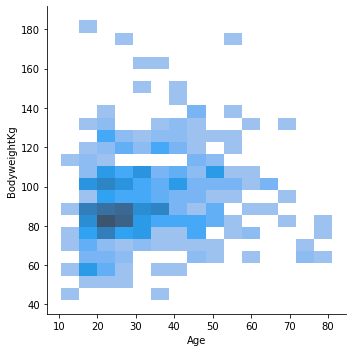

In [124]:
sb.displot(x = 'Age', y='BodyweightKg', data = sample_data[sample_data['Sex'] == 'M'])

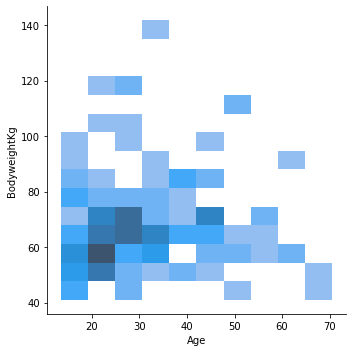

In [125]:
sb.displot(x = 'Age', y='BodyweightKg', data = sample_data[sample_data['Sex'] == 'F'])

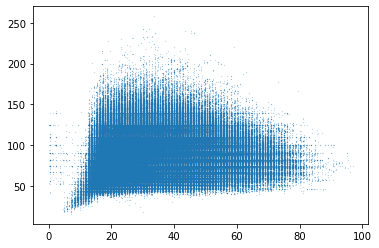

In [126]:
# same scatter plot but size is different
plt.scatter(age, body_weight, s= 0.01)
# still not helpful

In [127]:
# # take random sample of first 10K points
# import random
# N = lifting_df.count()['Name']
# delta_age = np.random.normal(size=N)
# delta_weight = np.random.normal(size=N)
# idx = random.sample(range(N),10000)

In [128]:
# we now have a random sample plotted with 10k points
# note the axes have changes, i belive they represent standard deviations
plt.scatter()
#don't know how to interpret this graph

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [ ]:
#Let's try making points semitransparent
plt.scatter(age, body_weight, alpha = 0.5, s=0.01)
# doesn't help

In [ ]:
#this is the age series
age = sample_data['Age']

#this is the Bodyweight series
body_weight = sample_data['BodyweightKg'] 

plt.scatter(age, body_weight)

In [ ]:
# let's try 2D density
import seaborn as sns

# make dataframe for new plot
age_weight_df = pd.DataFrame({
    
    "age" : age,
    "body weight" : body_weight
})

age_weight_df

In [ ]:
#this cell took too long to execute

# sns.kdeplot(data=age_weight_df, x="age", y="body weight", cmap="Reds", shade=True)
# plt.show()

In [ ]:
# try jitter?
sns.stripplot(data=age_weight_df, x='age', y='body weight', jitter=0.2,size=2)

In [ ]:
lifting_df.head()

In [ ]:
squat = lifting_df['Best3SquatKg']
deadlift = lifting_df['Best3DeadliftKg']
bench = lifting_df['Best3BenchKg']

In [ ]:
deadlift_vs_squat = pd.DataFrame({
    "squat" : squat,
    "deadlift" : deadlift
}) 

In [ ]:
plt.scatter(squat, deadlift, s = 0.5, alpha=0.5)
plt.xlim(0,600)
plt.ylim(0,600)

In [ ]:
plt.scatter(squat, bench, s = 0.5, alpha=0.8)
plt.xlim(0,600)
plt.ylim(0,600)

In [ ]:
lifting_count = lifting_df.groupby('Sex').count()
m_count = lifting_count.loc["M","Name"]
f_count = lifting_count.loc["F","Name"]

In [ ]:
print(m_count,f_count)

In [ ]:
total_count = lifting_df.count()['Name']
total_count

In [ ]:
percent_m = 100 * m_count / total_count
percent_f = 100 * f_count / total_count

In [ ]:
plt.pie([percent_m, percent_f],labels=["Male", "Female"], autopct='%1.1f%%')


In [ ]:
lifting_df.head()

In [ ]:
mean_by_name_f = lifting_df[lifting_df['Sex']=="F"].groupby('Name').mean()
mean_by_name_f

In [ ]:
mean_by_name_m = lifting_df[lifting_df['Sex'] == "M"].groupby('Name').mean()
mean_by_name_m

In [ ]:
mean_IPF_f = mean_by_name_f['IPFPoints']
mean_IPF_f

In [ ]:
mean_IPF_m = mean_by_name_m['IPFPoints']
mean_IPF_m

In [ ]:
mean_IPF_f.max()

In [ ]:
mean_IPF_m.max()

In [ ]:
lifting_df_m = lifting_df[lifting_df['Sex']=='M']

In [ ]:
mean_lifting_df_m = lifting_df_m.groupby("AgeClass").mean()

In [ ]:
age_class_body_weight = mean_lifting_df_m['BodyweightKg']

In [ ]:
age_class_body_weight = age_class_body_weight.reset_index()

In [ ]:
fig = plt.figure(figsize = (20, 15))
plt.bar(age_class_body_weight['AgeClass'],age_class_body_weight['BodyweightKg'])

In [ ]:
lifting_df.groupby('MeetCountry').mean()

In [ ]:
lifting_df.count()

In [ ]:
countries = lifting_df['MeetCountry'].unique()

In [ ]:
lifting_df.groupby('MeetName').count()

In [ ]:
a = lifting_df.groupby('Name').count()['Sex']

In [ ]:
max(list(a))

In [ ]:
plt.hist(a, bins = 15)
plt.xlim(0,80)

In [ ]:
b = lifting_df.groupby('AgeClass').count()['Name']

In [ ]:
plt.hist(b, bins=20)

In [ ]:
m_f = lifting_df.groupby('Sex').mean()
m_f

In [ ]:
m_f = m_f[['Age','BodyweightKg','Best3SquatKg','Best3BenchKg','Best3DeadliftKg','TotalKg','IPFPoints']]

In [ ]:
for category in m_f.columns:
    m_f[category] = m_f[category].map('{:.0f}'.format)

In [ ]:
m_f

In [ ]:
x = lifting_df['Age']
y = lifting_df['TotalKg']

In [ ]:
plt.scatter(x,y, s = 0.5, alpha = 0.5)

In [ ]:
# libraries
# import seaborn as sns

 
# # Dataset:
# df=pd.DataFrame({'x': np.random.normal(10, 1.2, 20000), 'y': np.random.normal(10, 1.2, 20000), 'group': np.repeat('A',20000) })
# tmp1=pd.DataFrame({'x': np.random.normal(14.5, 1.2, 20000), 'y': np.random.normal(14.5, 1.2, 20000), 'group': np.repeat('B',20000) })
# tmp2=pd.DataFrame({'x': np.random.normal(9.5, 1.5, 20000), 'y': np.random.normal(15.5, 1.5, 20000), 'group': np.repeat('C',20000) })
# df=df.append(tmp1).append(tmp2)

# # 2D density plot:
# sns.kdeplot(data = df, x="x", y="y", cmap="Reds", shade=True)
# plt.title('Overplotting? Try 2D density graph', loc='left')
# plt.show()

In [ ]:
import seaborn as sns

adf = pd.DataFrame({
    "x" : x,
    "y" : y
})

sns.displot(adf, x="x", y="y")

In [ ]:
x = lifting_df['Age']
y = lifting_df['BodyweightKg']

In [ ]:

adf = pd.DataFrame({
    "x" : x,
    "y" : y
})

sns.displot(adf, x="x", y="y")

In [ ]:
x = lifting_df['BodyweightKg']
y = lifting_df['IPFPoints']

In [ ]:
adf = pd.DataFrame({
    "x" : x,
    "y" : y
})

sns.displot(adf, x="x", y="y")

In [ ]:
x = lifting_df['Best3BenchKg']
y = lifting_df['IPFPoints']

adf = pd.DataFrame({
    "x" : x,
    "y" : y
})

sns.displot(adf, x="x", y="y")

In [ ]:
lifting_df.columns

In [ ]:
x = lifting_df['Squat1Kg']
y = lifting_df['Squat3Kg']
adf = pd.DataFrame({
    "x" : x,
    "y" : y
})

sns.displot(adf, x="x", y="y")

In [ ]:
x = lifting_df['Squat2Kg']
y = lifting_df['Squat3Kg']
adf = pd.DataFrame({
    "x" : x,
    "y" : y
})

sns.displot(adf, x="x", y="y")

In [ ]:
x = lifting_df['Equipment']
y = lifting_df['IPFPoints']
z = lifting_df['Sex']
adf = pd.DataFrame({
    "x" : x,
    "y" : y,
    'Sex' : z
})

sns.displot(adf, x="x", y="y", hue='Sex')

In [ ]:
new_df = lifting_df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])

In [ ]:
new_df

In [ ]:
new_df[new_df < 0] = 0

In [ ]:
new_df

In [ ]:
new_df[new_df.isnull()] = 0

In [ ]:
new_df

In [ ]:
lifting_df.columns

In [ ]:
a = lifting_df[['MeetName','Date']].value_counts()

In [ ]:
b = lifting_df.set_index(['MeetName','Date'])

In [ ]:
x = b['MeetCountry']

In [ ]:
df =pd.DataFrame(x)
df.tail(20)

In [ ]:
df['MeetCountry'].unique()

In [ ]:
my_dict = {}
for country in list(df['MeetCountry']):
    if country not in list(my_dict.keys()):
        my_dict[country] = 0
    my_dict[country] += 1
    
print(my_dict)


    
    
    

In [ ]:

plt.bar(list(my_dict.keys()), list(my_dict.values()))

In [ ]:
del my_dict['USA']
plt.bar(list(my_dict.keys()), list(my_dict.values()))
plt.xlim(0, 20)

In [ ]:
lifting_df.head()

In [ ]:
lifting_df["Date"] = pd.to_datetime(lifting_df['Date'], format = '%Y-%m-%d')
lifting_df['Date']

#user_df['datetime']= pd.to_datetime(user_df['datetime'], format='%Y-%m-%dT%H:%M:%S.%f%z')

In [ ]:
 lifting_df = lifting_df.sort_values('Date')

In [ ]:
lifting_df.tail()

In [ ]:
mean_df = lifting_df.groupby('Date').median()
mean_df

In [ ]:
mean_df.index

In [ ]:
a = list(mean_df.index)

In [ ]:
b =list(mean_df['Age'])

In [ ]:
plt.plot(a,b)

In [ ]:
c = list(mean_df['BodyweightKg'])

In [ ]:
plt.plot(a,c)

In [ ]:
plt.plot(a, list(mean_df['TotalKg']))

In [ ]:
plt.plot(a, list(mean_df['Best3SquatKg']))

In [ ]:
plt.plot(a, list(mean_df['Best3BenchKg']))

In [ ]:
plt.plot(a, list(mean_df['Best3DeadliftKg']))

In [ ]:
lifting_df.head()

In [ ]:
q = lifting_df.groupby('Equipment').count()

In [ ]:
y= list(q.index)

In [ ]:
z = list(q['Name'])

In [ ]:
plt.bar(y,z)

In [ ]:
r =lifting_df.groupby('Equipment').mean()

In [ ]:
plt.bar(list(r.index),list(r['TotalKg']))

In [ ]:
r2 =lifting_df.groupby('Equipment').median()

In [ ]:
plt.bar(list(r2.index),list(r['TotalKg']))

In [ ]:
plt.bar(list(r2.index),list(r['Best3BenchKg']))

In [ ]:
plt.bar(list(r2.index),list(r['Best3SquatKg']))

In [ ]:
plt.bar(list(r2.index),list(r['Best3DeadliftKg']))

In [ ]:
lifting_df

In [ ]:
#make copy of dataframe
new_lifting_df = lifting_df
new_lifting_df['Success'] = 0
new_lifting_df['Failed'] = 0
new_lifting_df = new_lifting_df.drop(labels=['Squat4Kg','Bench4Kg','Deadlift4Kg'], axis=1)

In [ ]:
new_lifting_df.head()

In [ ]:
lst = lifting_df['Age'].dropna()

In [ ]:
plt.boxplot(lst)

In [ ]:
lst2 = lifting_df['TotalKg'].dropna()
plt.boxplot(lst2)

In [ ]:
lst3 = lifting_df['BodyweightKg'].dropna()
plt.boxplot(lst3)

In [ ]:
u = dict(lifting_df['Division'].value_counts())

In [ ]:
list_divisions = list(lifting_df['Division'].unique())

In [ ]:
pro_index = list_divisions.index('Pro')

In [46]:
list_divisions[pro_index]

'Pro'

,Division
0,True
1,True
2,True
3,True
4,True


0          True
1          True
2          True
3          True
4          True
           ... 
1423349    True
1423350    True
1423351    True
1423352    True
1423353    True
Name: Division, Length: 1415176, dtype: bool

In [9]:
divisions = lifting_df['Division']

In [10]:
divisions

0               F-OR
1               F-OR
2               F-OR
3               F-OR
4               F-OR
             ...    
1423349    Masters 2
1423350    Masters 2
1423351    Masters 2
1423352    Masters 2
1423353    Masters 2
Name: Division, Length: 1423354, dtype: object

In [12]:
devisions_list = list(divisions)

In [22]:
divisions_df = lifting_df[lifting_df['Division'].notna()]
divisions_df.isnull().sum()

Name                     0
Sex                      0
Event                    0
Equipment                0
Age                 662659
AgeClass            633407
Division                 0
BodyweightKg         16527
WeightClassKg        12848
Squat1Kg           1081790
Squat2Kg           1085973
Squat3Kg           1095406
Squat4Kg           1411514
Best3SquatKg        389476
Bench1Kg            920686
Bench2Kg            926938
Bench3Kg            941793
Bench4Kg           1405777
Best3BenchKg        145954
Deadlift1Kg        1055863
Deadlift2Kg        1063333
Deadlift3Kg        1079235
Deadlift4Kg        1406012
Best3DeadliftKg     339326
TotalKg             109177
Place                    0
Wilks               117795
McCulloch           117946
Glossbrenner        117795
IPFPoints           148893
Tested              325819
Country            1031029
Federation               0
Date                     0
MeetCountry              0
MeetState           477366
MeetName                 0
d

In [29]:
pro_lifting_df = divisions_df[divisions_df['Division'].str.contains('Pro', case=False)]

In [30]:
list(pro_lifting_df['Division'].unique())

['Pro O',
 'Pro Cash Division',
 'Pro Open',
 'Pro Teen',
 'Pro Juniors',
 'Pro Masters 60-64',
 'Pro Submasters',
 'pro Masters 55-59',
 'Pro Masters 50-54',
 'Pro Masters 55-59',
 'Pro Masters 45-49',
 'Pro Masters 40-44',
 'Pro Masters',
 'Pro Masters 70-74',
 'Pro Masters 75-79',
 'Pro',
 'Former Pro',
 'Pro Submasters 33-39',
 'Pro Juniors 20-23',
 'Pro Teen 15-19',
 'Pro Girls',
 'Pro Masters 40-49',
 'Pro Masters 50-59',
 'Pro Masters 60-69',
 'Pro Teen 13-19',
 'Pro Masters 70-79',
 'Pro Open 24-39',
 'Pro Masters 65-69',
 'Tested Pro Open',
 'Tested Pro Teen 15-19',
 'Tested Pro Juniors 20-23',
 'Tested Pro Masters 55-59',
 'Tested Pro Masters 40-44',
 'Tested Pro Masters 60-64',
 'Tested Pro Masters 50-54',
 'Tested Pro Masters',
 'Tested Pro Masters 65-69',
 'Tested Pro Masters 45-49',
 'Tested Pro Teen 13-19',
 'Tested Pro Masters 50-59',
 'Tested Pro Masters 40-49',
 'Pro Teen 14-15',
 'Pro Junior',
 'Pro Teen 16-17',
 'Pro Teen 18-19',
 'M-Pro',
 'Pro Masters (40-44)',
 '

In [32]:
pro_lifting_df

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
44733,Arkadiy Shalokha,M,SBD,Wraps,32.0,24-34,Pro O,79.80,82.5,285.0,...,550.44,531.75,851.49,NaN,NaN,UkrainePA,2015-02-28,Ukraine,NaN,Ukrainian Central Region Championships
44735,Pavlo Ischenko,M,SBD,Single-ply,23.0,20-23,Pro O,92.30,100,270.0,...,479.15,461.48,590.53,NaN,Ukraine,UkrainePA,2015-02-28,Ukraine,NaN,Ukrainian Central Region Championships
44757,Egor Polomoshnov,M,B,Raw,34.5,24-34,Pro O,103.10,110,NaN,...,111.28,106.84,652.59,NaN,Ukraine,UkrainePA,2015-02-28,Ukraine,NaN,Ukrainian Central Region Championships
44763,Arkadiy Shalokha,M,B,Single-ply,32.0,24-34,Pro O,79.80,82.5,NaN,...,181.20,175.05,785.39,NaN,NaN,UkrainePA,2015-02-28,Ukraine,NaN,Ukrainian Central Region Championships
44764,Davlet Bekniyazov,M,B,Single-ply,29.5,24-34,Pro O,89.00,90,NaN,...,93.10,89.74,467.86,NaN,NaN,UkrainePA,2015-02-28,Ukraine,NaN,Ukrainian Central Region Championships
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420092,Oleh Pylypiak,M,S,Raw,NaN,20-23,Pro Juniors 20-23,117.12,125,NaN,...,170.51,162.91,661.05,NaN,NaN,RPS,2018-04-14,USA,PA,PowerPalooza 20
1420093,Oleh Pylypiak,M,D,Raw,NaN,20-23,Pro Juniors 20-23,117.12,125,NaN,...,178.37,170.42,643.94,NaN,NaN,RPS,2018-04-14,USA,PA,PowerPalooza 20
1420094,Patrick J Hall,M,S,Wraps,NaN,NaN,Pro Open,185.88,140+,NaN,...,218.62,203.85,728.48,NaN,NaN,RPS,2018-04-14,USA,PA,PowerPalooza 20
1420117,David Carr,M,BD,Raw,NaN,20-23,Pro Juniors 20-23,100.00,100,NaN,...,NaN,NaN,NaN,NaN,NaN,RPS,2016-06-11,USA,PA,Pennsylvania Ironman Championships


In [33]:
pro_lifting_df.groupby('Sex').mean()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner,IPFPoints
Sex,,,,,,,,,,,,,,,,,,,,,
F,31.602427,65.808324,60.690552,53.018034,6.379187,58.997429,146.533947,48.068348,30.327215,-9.810945,...,96.046318,82.413674,18.185643,-33.433563,149.75511,248.946673,258.647499,264.799111,227.799147,581.845708
M,32.346272,97.898741,108.392266,83.599838,17.957269,22.907000,267.892037,101.101077,61.653113,-24.608360,...,170.119964,130.268039,-5.869037,-58.804751,258.20163,417.328116,257.802620,264.359323,247.532283,595.114516


In [71]:
age = pro_lifting_df['Age']
bodyweight = pro_lifting_df['BodyweightKg']
sex = pro_lifting_df['Sex']
colors = {'M': 'blue', "F": 'yellow'}

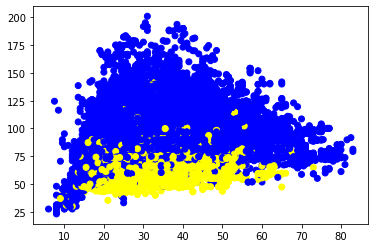

In [72]:
plt.scatter(age, bodyweight, c = sex.map(colors))

In [73]:
total_lift = pro_lifting_df['TotalKg']

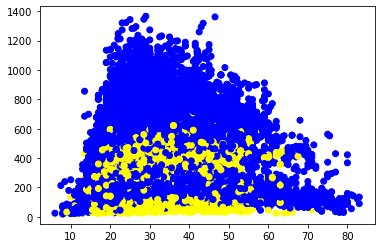

In [75]:
plt.scatter(age, total_lift, c = sex.map(colors))

In [86]:
pro_sums = pro_lifting_df.groupby('Sex').sum()
nums = list(pro_sums['TotalKg'])
gender = list(pro_sums.index)

In [88]:
print(nums)
print(gender)

[921102.69, 10643953.6]
['F', 'M']


([<matplotlib.patches.Wedge at 0x7fa027073a50>,
 [Text(1.06574563083948, 0.27237152998534814, 'F'),
  Text(-1.0657456435901103, -0.27237148009419426, 'M')],
 [Text(0.5813157986397163, 0.14856628908291714, '8.0'),
  Text(-0.5813158055946055, -0.14856626186956048, '92.0')])

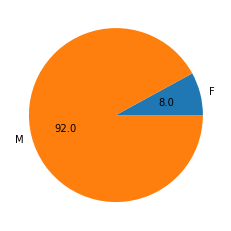

In [101]:
plt.pie(nums, labels = gender, autopct= "%.1f")

([<matplotlib.patches.Wedge at 0x7fa02703a190>,
 [Text(1.0166960891307861, 0.4199155419202355, 'F'),
  Text(-1.0166960989596183, -0.4199155181227458, 'M')],
 [Text(0.5545615031622468, 0.22904484104740117, '12.5'),
  Text(-0.5545615085234281, -0.2290448280669522, '87.5')])

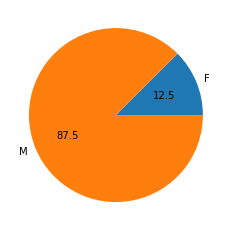

In [102]:
plt.pie(list(pro_sums['IPFPoints']), labels = gender, autopct= "%.1f")

In [105]:
pro_lifting_df.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
       'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Wilks',
       'McCulloch', 'Glossbrenner', 'IPFPoints', 'Tested', 'Country',
       'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName'],
      dtype='object')

In [108]:
pro_lifting_df.dtypes

Name                object
Sex                 object
Event               object
Equipment           object
Age                float64
AgeClass            object
Division            object
BodyweightKg       float64
WeightClassKg       object
Squat1Kg           float64
Squat2Kg           float64
Squat3Kg           float64
Squat4Kg           float64
Best3SquatKg       float64
Bench1Kg           float64
Bench2Kg           float64
Bench3Kg           float64
Bench4Kg           float64
Best3BenchKg       float64
Deadlift1Kg        float64
Deadlift2Kg        float64
Deadlift3Kg        float64
Deadlift4Kg        float64
Best3DeadliftKg    float64
TotalKg            float64
Place               object
Wilks              float64
McCulloch          float64
Glossbrenner       float64
IPFPoints          float64
Tested              object
Country             object
Federation          object
Date                object
MeetCountry         object
MeetState           object
MeetName            object
d

In [129]:
pro_lifting_df["Date"] = pd.to_datetime(pro_lifting_df['Date'], format = '%Y-%m-%d')
pro_lifting_df['Date']

/Users/johnwhendricks/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


44733     2015-02-28
44735     2015-02-28
44757     2015-02-28
44763     2015-02-28
44764     2015-02-28
             ...    
1420092   2018-04-14
1420093   2018-04-14
1420094   2018-04-14
1420117   2016-06-11
1420120   2016-06-11
Name: Date, Length: 31193, dtype: datetime64[ns]

In [130]:
pro_lifting_df.dtypes

Name                       object
Sex                        object
Event                      object
Equipment                  object
Age                       float64
AgeClass                   object
Division                   object
BodyweightKg              float64
WeightClassKg              object
Squat1Kg                  float64
Squat2Kg                  float64
Squat3Kg                  float64
Squat4Kg                  float64
Best3SquatKg              float64
Bench1Kg                  float64
Bench2Kg                  float64
Bench3Kg                  float64
Bench4Kg                  float64
Best3BenchKg              float64
Deadlift1Kg               float64
Deadlift2Kg               float64
Deadlift3Kg               float64
Deadlift4Kg               float64
Best3DeadliftKg           float64
TotalKg                   float64
Place                      object
Wilks                     float64
McCulloch                 float64
Glossbrenner              float64
IPFPoints     

In [140]:
time_df = pro_lifting_df.sort_values('Date').groupby('Date').mean()

In [142]:
time = time_df.index

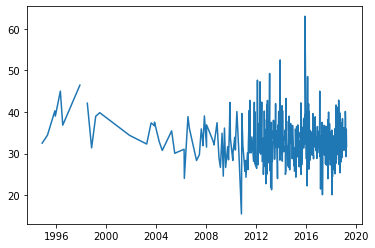

In [146]:
plt.plot(time, time_df['Age'])

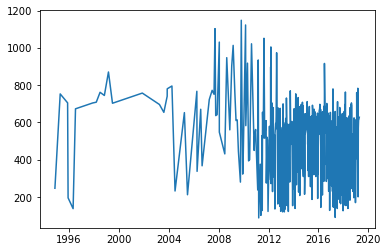

In [147]:
plt.plot(time, time_df['TotalKg'])

In [149]:
import datetime 
pro_lifting_df['Year'] = pd.DatetimeIndex(pro_lifting_df['Date']).year

/Users/johnwhendricks/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [152]:
pro_lifting_df = pro_lifting_df.sort_values('Date')

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner,IPFPoints
Year,,,,,,,,,,,,,,,,,,,,,
1994,32.500000,98.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,246.944444,159.458750,159.908750,149.853750,682.271250
1995,38.500000,104.815089,419.570000,467.650000,-498.950000,430.910000,302.409157,342.460000,349.270000,-362.870000,...,331.120000,NaN,NaN,NaN,269.400506,590.456106,378.470093,381.147850,359.215888,566.354206
1996,37.461538,96.612245,NaN,NaN,NaN,NaN,272.156047,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,255.200476,661.471556,442.310698,444.300930,415.380465,564.286744
1997,46.447368,101.854630,NaN,NaN,NaN,272.157500,296.179259,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,267.872778,704.722034,443.359074,467.626852,421.235926,572.005185
1998,34.529412,104.519255,NaN,NaN,NaN,278.075000,310.072708,NaN,NaN,NaN,...,NaN,NaN,NaN,294.080000,276.951771,748.850686,462.305484,466.027419,439.497849,579.818387
1999,39.379310,107.637681,184.292353,139.013235,14.632258,NaN,314.880147,176.755806,81.427419,-1.663000,...,287.006129,148.953871,-101.397083,NaN,284.138955,775.454861,471.155909,481.799848,448.768636,592.053485
2001,34.381579,106.010101,137.979462,60.297391,-59.450787,NaN,320.746552,116.702952,77.949700,-31.064646,...,209.140430,104.244881,-117.844605,NaN,286.491667,757.791828,449.676190,454.565357,430.471667,584.584524
2003,36.367347,105.301487,195.178033,78.588780,-51.844298,-369.905000,325.047257,95.177671,44.462086,-46.407652,...,181.113445,76.136168,-67.081000,NaN,277.425153,717.970295,444.334640,451.059320,423.764400,596.373840
2004,32.113636,106.626813,126.789048,-12.690000,89.186750,NaN,339.378462,117.524861,-24.397286,-87.229692,...,201.895600,127.098571,-101.368261,NaN,275.025918,506.430405,299.202329,299.514658,286.821781,575.344247


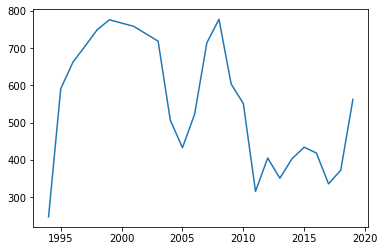

In [157]:
plt.plot(pro_lifting_df.groupby('Year').mean().index, pro_lifting_df.groupby('Year').mean()['TotalKg'])

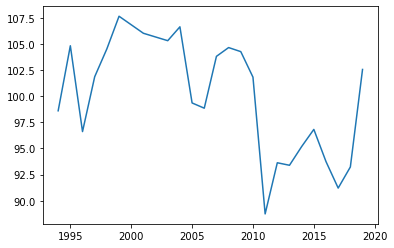

In [158]:
plt.plot(pro_lifting_df.groupby('Year').mean().index, pro_lifting_df.groupby('Year').mean()['BodyweightKg'])

In [163]:
elite_df = pro_lifting_df[pro_lifting_df['Division'] == 'Elite Pro Open']

In [164]:
elite_df

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName,Year
1019868,Ivan Ryabenkov,M,SBD,Wraps,23.0,20-23,Elite Pro Open,144.0,140+,385.0,...,516.07,750.29,NaN,Russia,WPU-RUS,2019-02-23,Russia,NaN,Metropolis Tournament,2019
1019867,Sergey Odegov,M,SBD,Wraps,42.0,40-44,Elite Pro Open,131.8,140,315.0,...,474.41,700.85,NaN,Russia,WPU-RUS,2019-02-23,Russia,NaN,Metropolis Tournament,2019
1019866,Aleksandr Lugovoy,M,SBD,Wraps,23.0,20-23,Elite Pro Open,136.0,140,320.0,...,497.87,733.12,NaN,Russia,WPU-RUS,2019-02-23,Russia,NaN,Metropolis Tournament,2019
1019865,Nizami Tagiev,M,SBD,Wraps,27.0,24-34,Elite Pro Open,114.1,125,290.0,...,501.26,772.48,NaN,Russia,WPU-RUS,2019-02-23,Russia,NaN,Metropolis Tournament,2019
1019864,Vladimir Marchenko,M,SBD,Wraps,34.0,24-34,Elite Pro Open,124.0,125,340.0,...,507.18,767.53,NaN,Russia,WPU-RUS,2019-02-23,Russia,NaN,Metropolis Tournament,2019
1019863,Konstantin Morozov,M,SBD,Wraps,34.0,24-34,Elite Pro Open,124.7,125,280.0,...,517.32,783.43,NaN,Russia,WPU-RUS,2019-02-23,Russia,NaN,Metropolis Tournament,2019
1019862,Sergey Akhlestin,M,SBD,Wraps,29.0,24-34,Elite Pro Open,105.6,110,320.0,...,520.65,817.36,NaN,NaN,WPU-RUS,2019-02-23,Russia,NaN,Metropolis Tournament,2019
1019861,Oleksii Melnyk,M,SBD,Wraps,29.0,24-34,Elite Pro Open,88.7,90,330.0,...,558.03,897.74,NaN,Ukraine,WPU-RUS,2019-02-23,Russia,NaN,Metropolis Tournament,2019
1019860,Evgeniy Gansh,M,SBD,Wraps,26.0,24-34,Elite Pro Open,74.7,75,-240.0,...,428.58,667.00,NaN,Russia,WPU-RUS,2019-02-23,Russia,NaN,Metropolis Tournament,2019


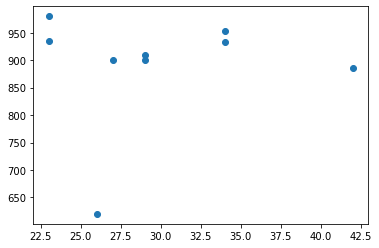

In [171]:
plt.scatter(elite_df['Age'], elite_df['TotalKg'] )